In [26]:
import numpy as np
import functools
import time
from matplotlib import pyplot as plt
from sklearn import datasets

data = np.array([[1,5],
                [3,6],
                [4,2],
                [3,7],
                [5,8],
                [25,31],
                [27,33],
                [23,25],
                [31,28],
                [33,31],
                [55,54],
                [59,51],
                [63,65],
                [56,62],
                [61,61]])

data_1d = np.array([1,5,3,2,6,25,26,24,27,28,53,52,50,49,51])
print(data_1d.ndim)
print(data.ndim)
#data_1d = data_1d.reshape(-1,1)
stack = np.column_stack([data_1d.reshape(-1,1),np.zeros(np.shape(data_1d))])
stack

1
2


array([[ 1.,  0.],
       [ 5.,  0.],
       [ 3.,  0.],
       [ 2.,  0.],
       [ 6.,  0.],
       [25.,  0.],
       [26.,  0.],
       [24.,  0.],
       [27.,  0.],
       [28.,  0.],
       [53.,  0.],
       [52.,  0.],
       [50.,  0.],
       [49.,  0.],
       [51.,  0.]])

In [27]:
# def timer(func):
#     @functools.wraps(func)
#     def wrapper_timer(*args, **kwargs):
#         start = time.perf_counter()
#         #'value' is the function being timed
#         value = func(*args, **kwargs)
#         end = time.perf_counter()
#         print(f'Finished {func.__name__!r} in {end-start:.8f} seconds!')
#         return value
#     return wrapper_timer

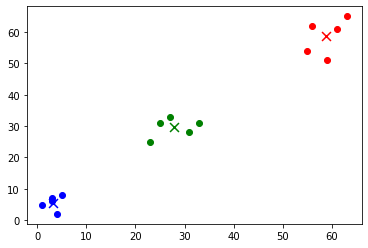

In [53]:
class k_means():
    def __init__(self, data, k):
        self.data = data
        if data.ndim == 1:
            self.data = np.column_stack([data.reshape(-1,1),np.zeros(np.shape(data))])
        self.k = k
    def ini_centroids(self, data, k):
        lst = []
        data_len = len(self.data)
        choices = np.random.choice(range(data_len), size=self.k, replace=False)
        for i in choices:
            lst.append([self.data[i]])
        #print('centroids = ' + str(lst))
        #print([i[0] for i in lst])
        return [i[0] for i in lst]
    def clusters(self,centroids):
        #print('cluster centroids = ' + str(centroids))
        cluster_vals = [[] for i in range(len(centroids))]
        #print(cluster_vals)
        for y in self.data:
            distances = []
            for x in centroids:
                distances.append(np.linalg.norm(y - x))
            #print(distances)
            idx = distances.index(min(distances))
            #print(idx)
            cluster_vals[idx].append(y)
        for i in range(len(cluster_vals)):
            if len(cluster_vals[i]) == 0:
                cluster_vals[i].append(centroids[i])
        #print(cluster_vals)               
        return cluster_vals
    def update(self,clust_vals):
        cluster_means = []
        for x in clust_vals:
            cluster_means.append(sum(x[::])/len(x))
            #print('x = ' + str(x))
        #print('means = ' + str(cluster_means))
        return self.clusters(cluster_means)
    #@timer
    def k_means_func(self):
        centroids = self.ini_centroids(self.data, self.k)
        cluster_values = self.clusters(centroids)
        updates = self.update(cluster_values)
        count = 0
        for i in range(len(updates)):
            if not np.array_equal(np.round(updates[i][0],3), np.round(self.update(updates)[i][0],3)):
                count += 1
                updates = self.update(updates)
                #print(updates)
        #print('It took ' + str(count) + ' cycles!')
        return updates
    def k_means_repeat(self):
        clusters = []
        variances = []
        for r in range(10):
            clusters.append(self.k_means_func())
        for x in clusters:
            count = 0
            for i in range(self.k):
                count += np.var(x[i])
                #print(np.var(x[i]))
            #print(count)
            variances.append(count)
        #print(variances)
        return clusters[variances.index(np.min(variances))]
    def plot(self):
        test_plot = self.k_means_func()
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print('test array = ' + str(np.mean(test_array[0][:,0])))
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
    def plot_2(self):
        test_plot = self.k_means_repeat()
        #print(test_plot)
        test_array = np.array([np.array(xi) for xi in test_plot],dtype=object)
        #print(test_array)
        colors = ['red','green','blue','purple','orange','brown','pink','olive','cyan','gray']
        for i in range(self.k):
            plt.scatter(test_array[i][:,0], test_array[i][:,1], color = colors[i])
            plt.scatter(np.mean(test_array[i][:,0]), np.mean(test_array[i][:,1]), marker='x', s=80, color=colors[i])
        return plt.show()
        
test = k_means(data, 3)    
#test.k_means_repeat()

test.plot_2()

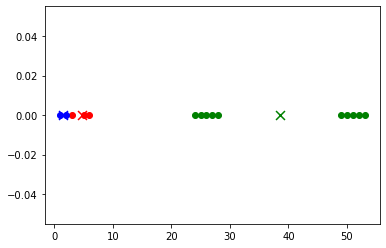

In [54]:
one_d = k_means(data_1d,3)
one_d.plot_2()

In [30]:
iris = datasets.load_iris()
#iris['data']

In [31]:
iris_k = k_means(iris['data'],3)
iris_k.k_means_repeat()

[[array([7. , 3.2, 4.7, 1.4]),
  array([6.4, 3.2, 4.5, 1.5]),
  array([6.9, 3.1, 4.9, 1.5]),
  array([6.5, 2.8, 4.6, 1.5]),
  array([5.7, 2.8, 4.5, 1.3]),
  array([6.3, 3.3, 4.7, 1.6]),
  array([6.6, 2.9, 4.6, 1.3]),
  array([5.9, 3. , 4.2, 1.5]),
  array([6.1, 2.9, 4.7, 1.4]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([5.6, 3. , 4.5, 1.5]),
  array([6.2, 2.2, 4.5, 1.5]),
  array([5.9, 3.2, 4.8, 1.8]),
  array([6.1, 2.8, 4. , 1.3]),
  array([6.3, 2.5, 4.9, 1.5]),
  array([6.1, 2.8, 4.7, 1.2]),
  array([6.4, 2.9, 4.3, 1.3]),
  array([6.6, 3. , 4.4, 1.4]),
  array([6.8, 2.8, 4.8, 1.4]),
  array([6.7, 3. , 5. , 1.7]),
  array([6. , 2.9, 4.5, 1.5]),
  array([6. , 2.7, 5.1, 1.6]),
  array([5.4, 3. , 4.5, 1.5]),
  array([6. , 3.4, 4.5, 1.6]),
  array([6.7, 3.1, 4.7, 1.5]),
  array([6.3, 2.3, 4.4, 1.3]),
  array([5.5, 2.6, 4.4, 1.2]),
  array([6.1, 3. , 4.6, 1.4]),
  array([5.7, 2.9, 4.2, 1.3]),
  array([6.2, 2.9, 4.3, 1.3]),
  array([6.3, 3.3, 6. , 2.5]),
  array([5.8, 2.7, 5.1, 1.9]),
  array(